In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

# Updated Path for Genome File
DATA_PATH = "../data/processed/master_hiv_genome.fasta"

print(f"Loading data from: {DATA_PATH}")

Loading data from: ../data/processed/master_hiv_genome.fasta


In [11]:
data = []

# Check if file exists first
if not os.path.exists(DATA_PATH):
    print(f"ERROR: File not found at {DATA_PATH}. Did you run the updated merger script?")
else:
    with open(DATA_PATH, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            # Header: >Subtype.Country.Year.Name.Accession
            parts = record.description.split('.')
            
            if len(parts) >= 5:
                subtype = parts[0]
                country = parts[1]
                year = parts[2]
                accession = parts[-1]
                
                # Clean Year
                if "-" in year: year = year.split("-")[0]
                
                data.append({
                    "Accession": accession,
                    "Subtype": subtype,
                    "Country": country,
                    "Year": year,
                    "Length": len(record.seq)
                })

    df = pd.DataFrame(data)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    print(f"Successfully loaded {len(df)} genome sequences.")
 

Successfully loaded 11229 genome sequences.


In [12]:
# --- PRINT STATS FOR CHATBOT CONTEXT ---
print("=== DATASET STATISTICS===")
print(f"Total Sequences: {len(df)}")
print(f"Length Stats (bp):\n{df['Length'].describe().to_string()}")
print("\nTop 10 Subtypes:")
print(df['Subtype'].value_counts().head(10).to_string())
print("\nTop 5 Countries:")
print(df['Country'].value_counts().head(5).to_string())
print("\nYear Range:")
print(f"Min Year: {df['Year'].min()}, Max Year: {df['Year'].max()}")
print("=============================================")

=== DATASET STATISTICS===
Total Sequences: 11229
Length Stats (bp):
count    11229.000000
mean      8929.922166
std        187.532525
min       8002.000000
25%       8866.000000
50%       8960.000000
75%       9012.000000
max       9865.000000

Top 10 Subtypes:
Subtype
B        6481
01_AE    1244
C         803
A1        253
A6        181
A1D       171
07_BC     137
0107      128
02_AG     124
01B       115

Top 5 Countries:
Country
US    4561
TH    1109
CN    1062
CA     593
ZA     482

Year Range:
Min Year: 1983, Max Year: 2024


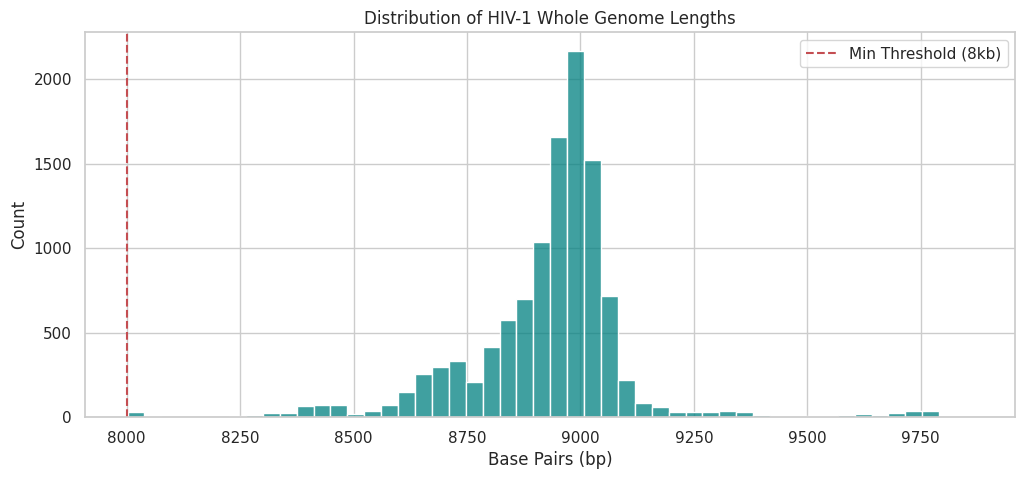

In [13]:
# 1. Length Distribution
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Length", bins=50, color="teal")
plt.title("Distribution of HIV-1 Whole Genome Lengths")
plt.xlabel("Base Pairs (bp)")
plt.axvline(x=8000, color='r', linestyle='--', label="Min Threshold (8kb)")
plt.legend()
plt.show()



/tmp/ipykernel_14746/3302105970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Subtype'].isin(top_subtypes)], x="Subtype", order=top_subtypes, palette="magma")


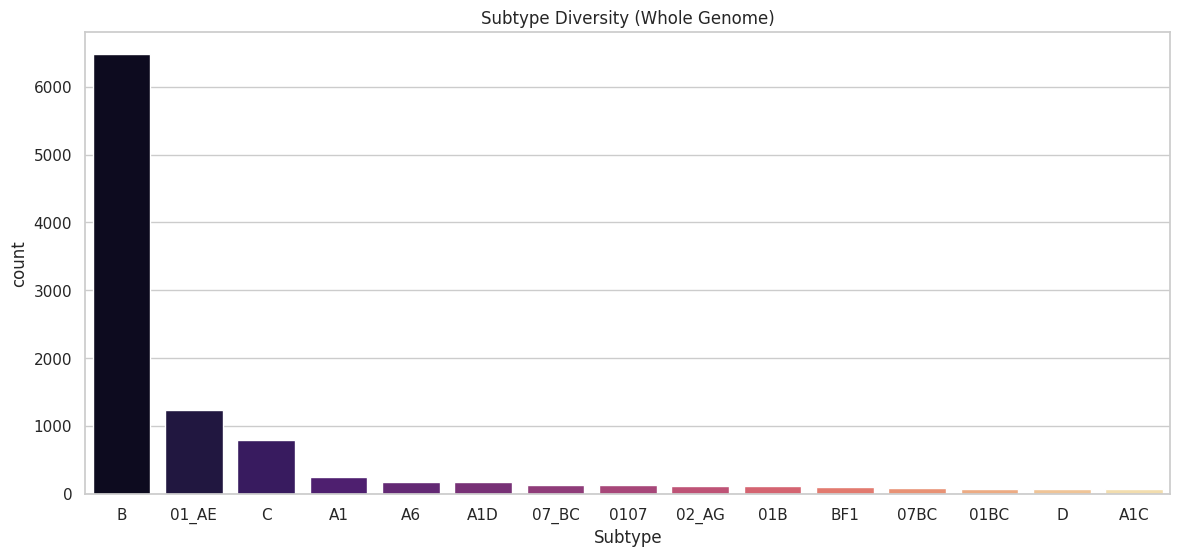

In [14]:
# 2. Subtype Distribution
plt.figure(figsize=(14, 6))
top_subtypes = df['Subtype'].value_counts().nlargest(15).index
sns.countplot(data=df[df['Subtype'].isin(top_subtypes)], x="Subtype", order=top_subtypes, palette="magma")
plt.title("Subtype Diversity (Whole Genome)")
plt.show()


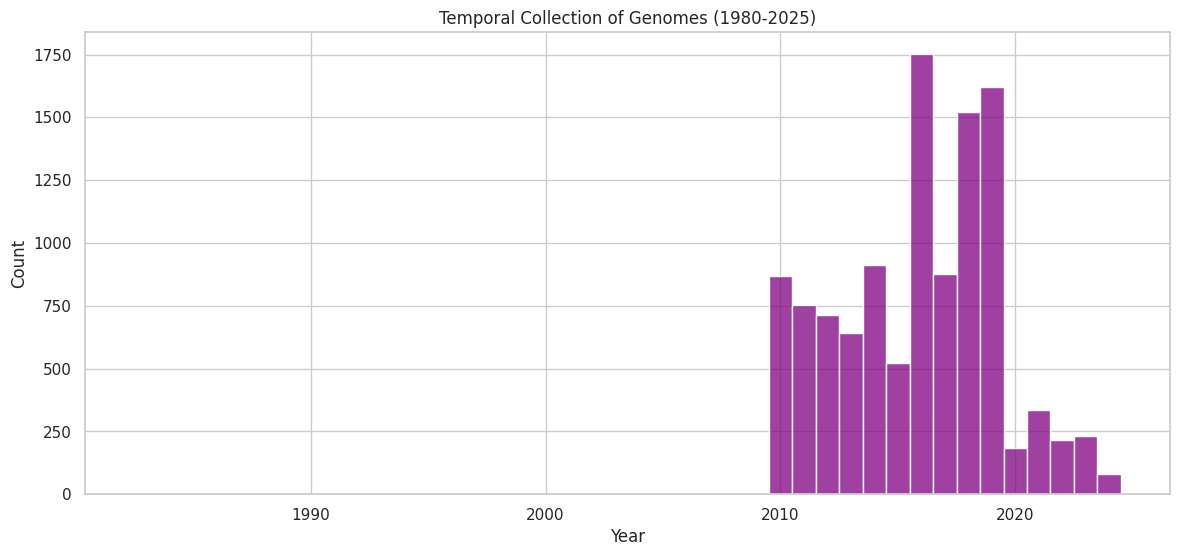

In [15]:
# 3. Temporal Distribution
plt.figure(figsize=(14, 6))
valid_years = df[(df['Year'] > 1980) & (df['Year'] <= 2025)]
sns.histplot(data=valid_years, x="Year", discrete=True, color="purple")
plt.title("Temporal Collection of Genomes (1980-2025)")
plt.show()

In [18]:
#333##############################
# BALANCED FASTA

In [16]:
# Updated Path for Genome File
DATA_PATH = "../data/processed/balanced_hiv_genome.fasta"

print(f"Loading data from: {DATA_PATH}")

Loading data from: ../data/processed/balanced_hiv_genome.fasta


In [17]:
data = []

# Check if file exists first
if not os.path.exists(DATA_PATH):
    print(f"ERROR: File not found at {DATA_PATH}. Did you run the updated merger script?")
else:
    with open(DATA_PATH, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            # Header: >Subtype.Country.Year.Name.Accession
            parts = record.description.split('.')
            
            if len(parts) >= 5:
                subtype = parts[0]
                country = parts[1]
                year = parts[2]
                accession = parts[-1]
                
                # Clean Year
                if "-" in year: year = year.split("-")[0]
                
                data.append({
                    "Accession": accession,
                    "Subtype": subtype,
                    "Country": country,
                    "Year": year,
                    "Length": len(record.seq)
                })

    df = pd.DataFrame(data)
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

    print(f"Successfully loaded {len(df)} genome sequences.")
 

Successfully loaded 3948 genome sequences.


In [19]:
# --- PRINT STATS FOR CHATBOT CONTEXT ---
print("=== DATASET STATISTICS===")
print(f"Total Sequences: {len(df)}")
print(f"Length Stats (bp):\n{df['Length'].describe().to_string()}")
print("\nTop 10 Subtypes:")
print(df['Subtype'].value_counts().head(10).to_string())
print("\nTop 5 Countries:")
print(df['Country'].value_counts().head(5).to_string())
print("\nYear Range:")
print(f"Min Year: {df['Year'].min()}, Max Year: {df['Year'].max()}")
print("=============================================")

=== DATASET STATISTICS===
Total Sequences: 3948
Length Stats (bp):
count    3948.000000
mean     8912.664134
std       261.877442
min      8002.000000
25%      8808.000000
50%      8935.000000
75%      9020.000000
max      9865.000000

Top 10 Subtypes:
Subtype
B        1371
01_AE     413
C         299
A6        176
02_AG     111
0107      105
07BC       93
A1         83
07_BC      80
01B        71

Top 5 Countries:
Country
CN    844
US    623
RU    302
BR    260
TH    244

Year Range:
Min Year: 1983, Max Year: 2024


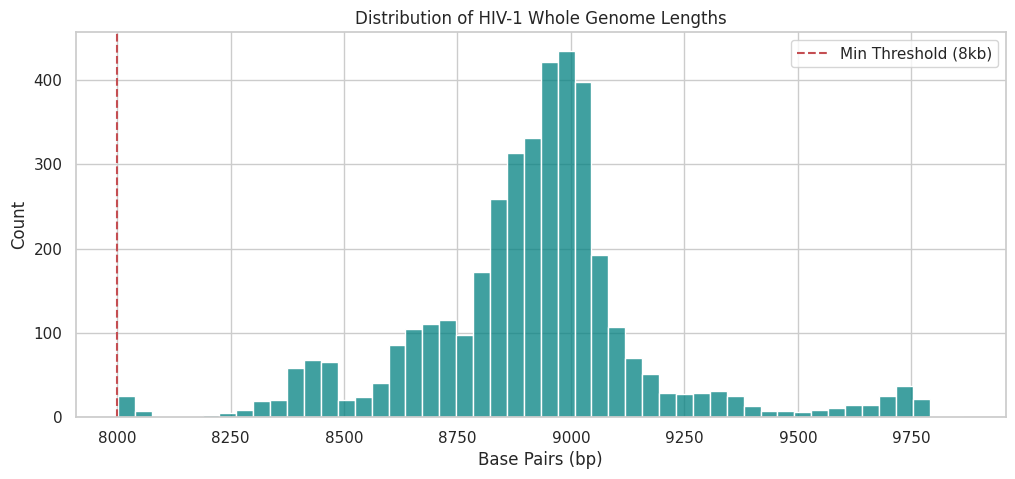

In [20]:
# 1. Length Distribution
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Length", bins=50, color="teal")
plt.title("Distribution of HIV-1 Whole Genome Lengths")
plt.xlabel("Base Pairs (bp)")
plt.axvline(x=8000, color='r', linestyle='--', label="Min Threshold (8kb)")
plt.legend()
plt.show()

/tmp/ipykernel_14746/535678446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Subtype'].isin(top_subtypes)], x="Subtype", order=top_subtypes, palette="magma")


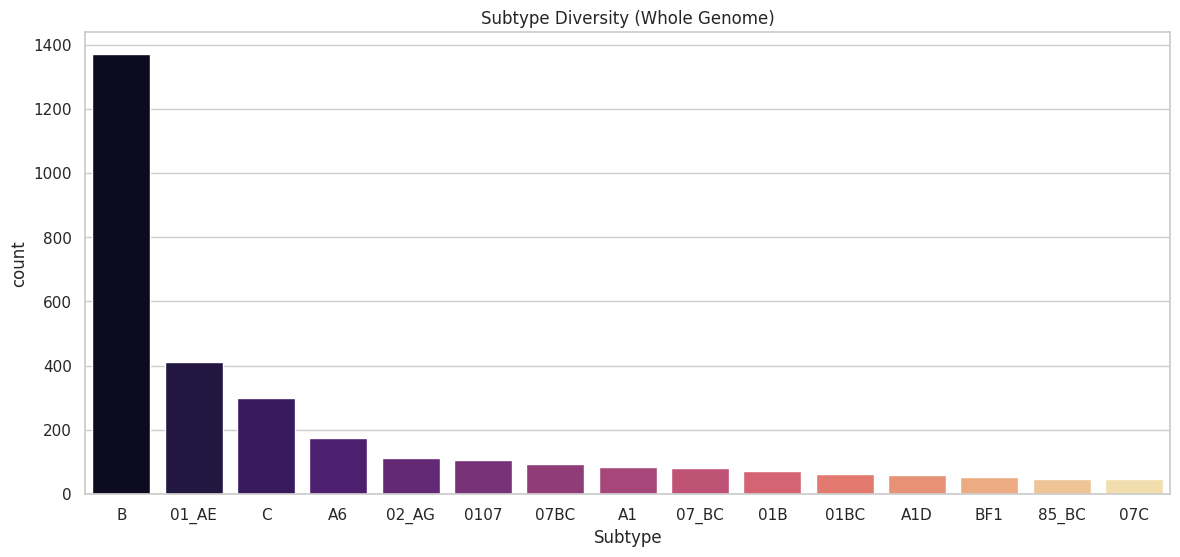

In [21]:
# 2. Subtype Distribution
plt.figure(figsize=(14, 6))
top_subtypes = df['Subtype'].value_counts().nlargest(15).index
sns.countplot(data=df[df['Subtype'].isin(top_subtypes)], x="Subtype", order=top_subtypes, palette="magma")
plt.title("Subtype Diversity (Whole Genome)")
plt.show()

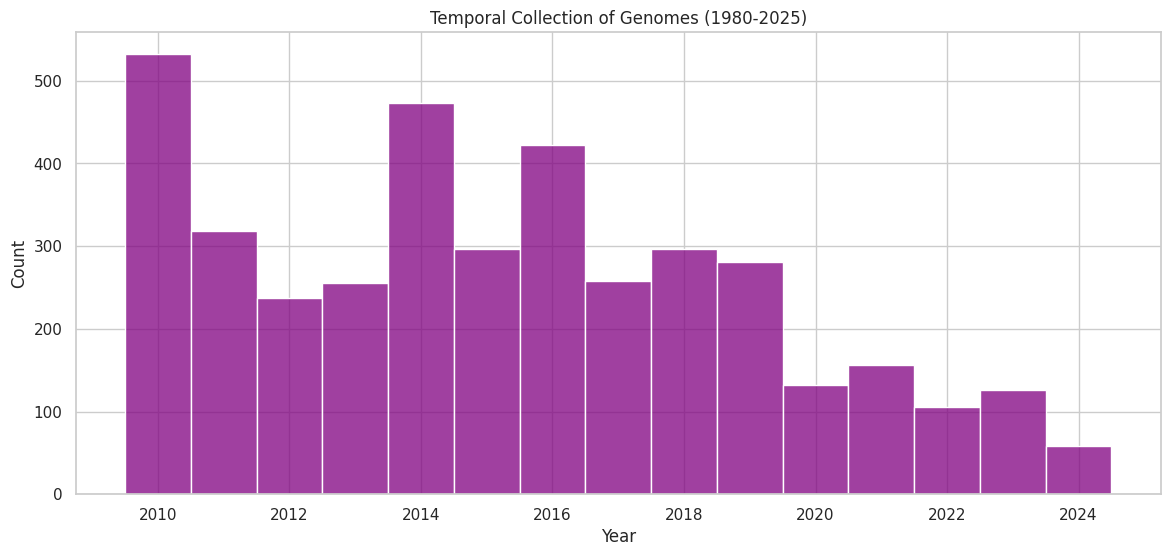

In [23]:
# 3. Temporal Distribution
plt.figure(figsize=(14, 6))
valid_years = df[(df['Year'] > 2009) & (df['Year'] <= 2025)]
sns.histplot(data=valid_years, x="Year", discrete=True, color="purple")
plt.title("Temporal Collection of Genomes (1980-2025)")
plt.show()